In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [3]:
iris=load_iris()

In [5]:
y=iris.target
X=iris.data

In [7]:
X.shape#查看X是几维变量

(150, 4)

In [8]:
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## PCA自定义主成分个数

In [10]:
#调用PCA
pca=PCA(n_components=2)#降维到2维度
pca=pca.fit(X)#拟合模型
X_dr=pca.transform(X)

In [17]:
X_dr[:3]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

In [18]:
#也可以一步到位
X_dr=pca.fit_transform(X)

In [20]:
#还可以使用一句话完成
X_dr=PCA(2).fit_transform(X)

In [21]:
X_dr[:3]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

In [19]:
X_dr[:3]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

## 可视化

In [25]:
X_dr[y==0,0],X_dr[y==0,1]

(array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
        -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
        -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
        -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
        -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
        -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
        -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
        -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
        -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
        -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978]),
 array([ 0.31939725, -0.17700123, -0.14494943, -0.31829898,  0.32675451,
         0.74133045, -0.08946138,  0.16338496, -0.57831175, -0.11377425,
         0.6450689 ,  0.01472994, -0.235112  , -0.51139459,  1.17876464,
         1.33806233,  0.81067951,  0.31184914,  0

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

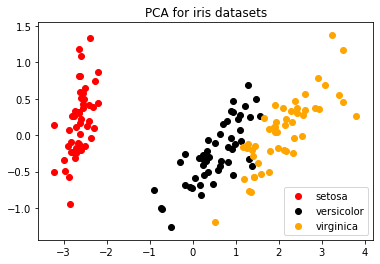

In [29]:
plt.figure()
plt.scatter(X_dr[y==0,0],X_dr[y==0,1],c="red",label=iris.target_names[0])
plt.scatter(X_dr[y==1,0],X_dr[y==1,1],c="black",label=iris.target_names[1])
plt.scatter(X_dr[y==2,0],X_dr[y==2,1],c="orange",label=iris.target_names[2])
plt.legend()
plt.title("PCA for iris datasets")
plt.show()

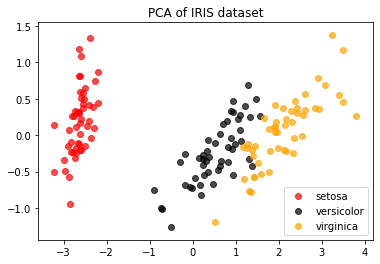

In [30]:
colors = ['red', 'black', 'orange']
iris.target_names
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i, 0]
               ,X_dr[y == i, 1]
               ,alpha=.7
               ,c=colors[i]
               ,label=iris.target_names[i]
               )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

### 可解释性方差的大小  
pca降维后的属性,查看降维后每个新特征向量上所带的信息量大小

In [32]:
pca.explained_variance_

array([4.22824171, 0.24267075])

## 可解释方差贡献率  
查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比

In [35]:
pca.explained_variance_ratio_
#大部分信息都被有效地集中在了第一个特征上

array([0.92461872, 0.05306648])

In [36]:
pca.explained_variance_ratio_.sum()

0.977685206318795

## 累积可解释方差贡献率曲线

In [37]:
pca_line=PCA().fit(X)

In [38]:
pca_line.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [39]:
np.cumsum(pca_line.explained_variance_ratio_)

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

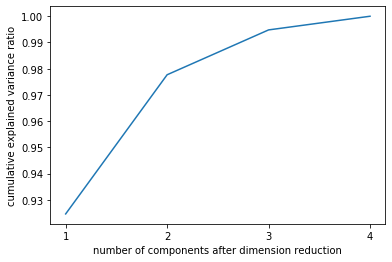

In [40]:
import numpy as np
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

所以我们可以看出来，当我们选取2个或者3个主成分的时候就已经达到了最佳的效果

##  PCA最大似然估计自选超参数

In [41]:
pca_mle=PCA(n_components="mle")
pca_mle=pca_mle.fit(X)
X_mle=pca_mle.transform(X)

In [43]:
X_mle[:3]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026]])

In [45]:
pca_mle.explained_variance_ratio_.sum()

0.9947878161267247

## 按照信息量的占比来操作PCA

In [46]:
pca_f=PCA(n_components=0.97,svd_solver="full")
#并且让参数svd_solver =='full'，
#表示希望降维后的总解释性方差占比大于n_components指定的百分比，

In [47]:
pca_f=pca_f.fit(X)

In [48]:
X_f=pca_f.transform(X)

In [49]:
X_f

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [50]:
pca_f.explained_variance_ratio_.sum()

0.977685206318795

In [55]:
X.shape

(150, 4)

In [53]:
PCA(2).fit(X).components_
#这就是降维后的新空间（k,n)

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [54]:
PCA(2).fit(X).components_.shape

(2, 4)